<a href="https://colab.research.google.com/github/Josphat-Malombe/deep_learning/blob/main/model_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
weight=0.9
bias = 0.3

start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X+bias
train_split=int(0.7*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(35, 35, 15, 15)

In [ ]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer=nn.Linear(in_features=1, out_features=1)

  def forward(self, X:torch.Tensor)->torch.Tensor:
    return self.linear_layer(X)


In [ ]:
torch.manual_seed(42)
model_exercise=LinearModel()


In [ ]:
criterion=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_exercise.parameters(),lr=0.01)

In [ ]:
torch.manual_seed
epochs = 100
for epoch in range(epochs):
  model_exercise.train()
  y_pred=model_exercise(X_train)
  loss=criterion(y_pred ,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_exercise.eval()
  with torch.inference_mode():
    test_pred=model_exercise(X_test)
    test_loss=criterion(test_pred,y_test)

  if epoch %10 == 0:
    print(f"Epoch: {epoch} Training Loss: {loss} Testing Loss: {test_loss}")



Epoch: 0 Training Loss: 0.0056626396253705025 Testing Loss: 0.014983976259827614
Epoch: 10 Training Loss: 0.002934972755610943 Testing Loss: 0.006946186069399118
Epoch: 20 Training Loss: 0.003966024145483971 Testing Loss: 0.004306380171328783
Epoch: 30 Training Loss: 0.003966024145483971 Testing Loss: 0.004306380171328783
Epoch: 40 Training Loss: 0.003966024145483971 Testing Loss: 0.004306380171328783
Epoch: 50 Training Loss: 0.003966024145483971 Testing Loss: 0.004306380171328783
Epoch: 60 Training Loss: 0.003966024145483971 Testing Loss: 0.004306380171328783
Epoch: 70 Training Loss: 0.003966024145483971 Testing Loss: 0.004306380171328783
Epoch: 80 Training Loss: 0.003966024145483971 Testing Loss: 0.004306380171328783
Epoch: 90 Training Loss: 0.003966024145483971 Testing Loss: 0.004306380171328783


In [ ]:
model_exercise.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8908]])),
             ('linear_layer.bias', tensor([0.2992]))])

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

    if predictions is not None:

        model_exercise.eval()
        with torch.inference_mode():
            predictions = model_exercise(test_data)

        predictions_np = predictions.detach().cpu().numpy()

        plt.scatter(test_data, predictions_np, c="r", s=4, label="Predictions")

    plt.legend()
    plt.show()

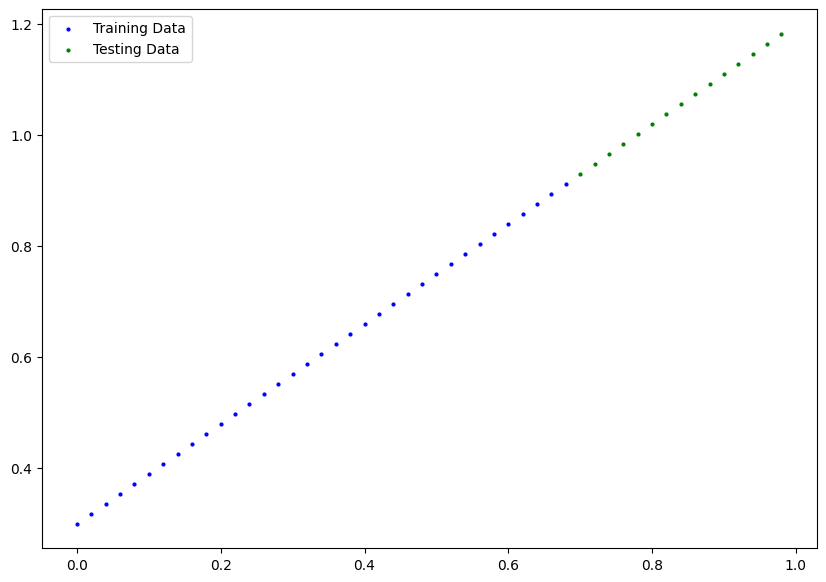

In [ ]:
plot_predictions()

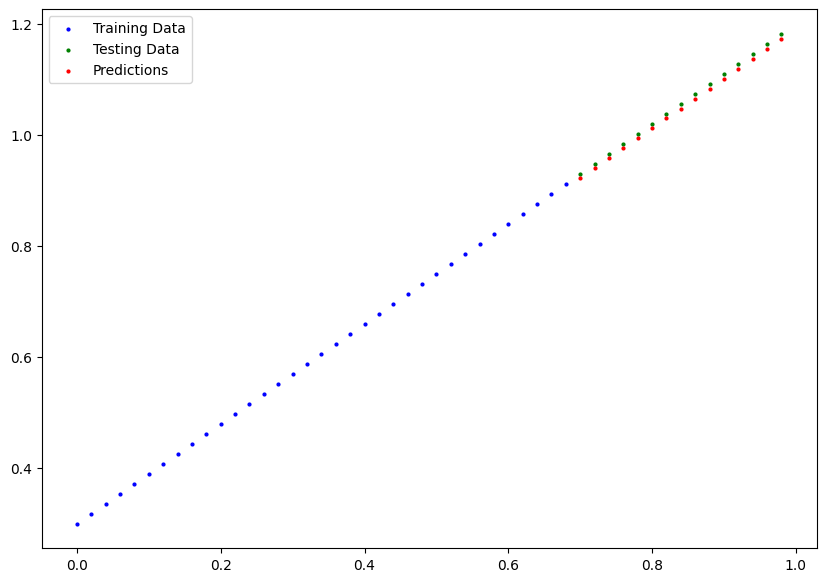

In [ ]:
plot_predictions(predictions=y_pred)